In [1]:



import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.stats import norm
import energyflow as ef #needed for the Geant4 datasets

In [2]:
import tensorflow as tf
from keras.layers import Dense, Input
from keras.models import Model
import tensorflow.keras.backend as K

import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ['CUDA_VISIBLE_DEVICES']="3"
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=24220)]) #in MB


2022-05-08 23:12:25.264780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-08 23:12:25.264859: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data - Delphes

In [3]:
w10 = 4.568e-10
w14 = 1.380e-11
w18 = 4.347e-13


myfile = open("Datasets/dijets.txt")
delphes_v2 = []
for line in myfile:
    if (len(line.split()) < 20):
        continue
    delphes_v2+=[[float(line.split()[0]),float(line.split()[1]),
               float(line.split()[2]),float(line.split()[3]),
               float(line.split()[4]),float(line.split()[5]),
               float(line.split()[6]),float(line.split()[7]),
               float(line.split()[8]),float(line.split()[9]),
               float(line.split()[10]),float(line.split()[11]),
               float(line.split()[12]),float(line.split()[13]),
               float(line.split()[14]),float(line.split()[15]),
               float(line.split()[16]),float(line.split()[17]),
               float(line.split()[18]),float(line.split()[19])]]
delphes_v2 = np.array(delphes_v2)

myfile = open("Datasets/dijets14.txt")
delphes14_v2 = []
for line in myfile:
    if (len(line.split()) < 20):
        continue
    delphes14_v2+=[[float(line.split()[0]),float(line.split()[1]),
               float(line.split()[2]),float(line.split()[3]),
               float(line.split()[4]),float(line.split()[5]),
               float(line.split()[6]),float(line.split()[7]),
               float(line.split()[8]),float(line.split()[9]),
               float(line.split()[10]),float(line.split()[11]),
               float(line.split()[12]),float(line.split()[13]),
               float(line.split()[14]),float(line.split()[15]),
               float(line.split()[16]),float(line.split()[17]),
               float(line.split()[18]),float(line.split()[19])]]
delphes14_v2 = np.array(delphes14_v2)

myfile = open("Datasets/dijets18.txt")
delphes18_v2 = []
for line in myfile:
    if (len(line.split()) < 20):
        continue
    delphes18_v2+=[[float(line.split()[0]),float(line.split()[1]),
               float(line.split()[2]),float(line.split()[3]),
               float(line.split()[4]),float(line.split()[5]),
               float(line.split()[6]),float(line.split()[7]),
               float(line.split()[8]),float(line.split()[9]),
               float(line.split()[10]),float(line.split()[11]),
               float(line.split()[12]),float(line.split()[13]),
               float(line.split()[14]),float(line.split()[15]),
               float(line.split()[16]),float(line.split()[17]),
               float(line.split()[18]),float(line.split()[19])]]
delphes18_v2 = np.array(delphes18_v2)


delphes_v2_all = np.concatenate([delphes_v2,delphes14_v2,delphes18_v2])
delphes_weights = np.concatenate([w10*np.ones(len(delphes_v2)),w14*np.ones(len(delphes14_v2)),w18*np.ones(len(delphes18_v2))])

In [4]:
#mjj

mjjs_delphes = []
mjjsg_delphes = []
weights_delphes = []
pTs_delphes = []
pTsg_delphes = []
etas_delphes = []
etasg_delphes = []

print(delphes_v2[0])

for i in range(len(delphes_v2)):
    
    #Truth
    pT1g = delphes_v2[i,1]
    pT2g = delphes_v2[i,11]
    
    y1g = delphes_v2[i,2]
    y2g = delphes_v2[i,12]
    
    phi1g = delphes_v2[i,3]
    phi2g = delphes_v2[i,13]
    
    m1g = delphes_v2[i,4]
    m2g = delphes_v2[i,14]
    
    ET1g = np.sqrt(pT1g**2+m1g**2)
    ET2g = np.sqrt(pT2g**2+m2g**2)
    
    mJJg = m1g**2+m2g**2+2*(ET1g*ET2g*np.cosh(y1g-y2g)-pT1g*pT2g*np.cos(phi1g-phi2g))
    mjjsg_delphes+=[mJJg**0.5]
    mjjsg_delphes+=[mJJg**0.5]
    pTsg_delphes+=[pT1g]
    pTsg_delphes+=[pT2g]
    etasg_delphes+=[y1g]
    etasg_delphes+=[y2g]
    
    #Reco
    pT1 = delphes_v2[i,6]
    pT2 = delphes_v2[i,16]
    
    y1 = delphes_v2[i,7]
    y2 = delphes_v2[i,17]
    
    phi1 = delphes_v2[i,8]
    phi2 = delphes_v2[i,18]
    
    m1 = delphes_v2[i,9]
    m2 = delphes_v2[i,19]
    
    ET1 = np.sqrt(pT1**2+m1**2)
    ET2 = np.sqrt(pT2**2+m2**2)
    
    mJJ = m1**2+m2**2+2*(ET1*ET2*np.cosh(y1-y2)-pT1*pT2*np.cos(phi1-phi2))
    mjjs_delphes+=[mJJ**0.5]
    mjjs_delphes+=[mJJ**0.5]
    pTs_delphes+=[pT1g]
    pTs_delphes+=[pT2g]
    etas_delphes+=[y1]
    etas_delphes+=[y2]
    
    weights_delphes+=[delphes_weights[i]]
    weights_delphes+=[delphes_weights[i]]

[ 0.00000e+00  9.60283e+02  4.05912e-01 -2.75399e+00  4.55495e+01
  1.00000e+00  9.87996e+02  4.06273e-01 -2.75291e+00  4.55495e+01
  1.00000e+00  6.65562e+02 -2.74401e-01  4.01456e-01  2.22392e+01
  0.00000e+00  1.01406e+03 -2.79573e-01  3.86054e-01  2.22392e+01]


# Data - GEANT

In [5]:
sim = ef.mod.load(dataset='sim',subdatasets=["SIM1000_Jet300_pT375-infGeV"])
gen = ef.mod.load(dataset='gen',subdatasets=["GEN1000_pT375-infGeV"])

sim14 = ef.mod.load(dataset='sim',subdatasets=["SIM1400_Jet300_pT375-infGeV"])
sim18 = ef.mod.load(dataset='sim',subdatasets=["SIM1800_Jet300_pT375-infGeV"])

gen14 = ef.mod.load(dataset='gen',subdatasets=["GEN1400_pT375-infGeV"])
gen18 = ef.mod.load(dataset='gen',subdatasets=["GEN1800_pT375-infGeV"])

In [6]:
simjets_f = sim.jets_f[0:20000]
sim14jets_f = sim14.jets_f[0:20000]
sim18jets_f = sim18.jets_f[0:20000]

In [7]:
#mjj

simjets = np.concatenate([sim.jets_f,sim14.jets_f,sim18.jets_f])

mjjs = []
mjjsg = []
weights = []
pTs = []
pTsg = []
etas = []
etasg = []
for i in range(int(len(simjets)/2.)):
    
    #Truth
    pT1g = simjets[2*i,8]
    pT2g = simjets[2*i+1,8]
    
    y1g = simjets[2*i,9]
    y2g = simjets[2*i+1,9]
    
    phi1g = simjets[2*i,10]
    phi2g = simjets[2*i+1,10]
    
    m1g = simjets[2*i,11]
    m2g = simjets[2*i+1,11]
    
    ET1g = np.sqrt(pT1g**2+m1g**2)
    ET2g = np.sqrt(pT2g**2+m2g**2)
    
    mJJg = m1g**2+m2g**2+2*(ET1g*ET2g*np.cosh(y1g-y2g)-pT1g*pT2g*np.cos(phi1g-phi2g))
    mjjsg+=[mJJg**0.5]
    mjjsg+=[mJJg**0.5]
    pTsg+=[pT1g]
    pTsg+=[pT2g]
    etasg+=[y1g]
    etasg+=[y2g]
    
    #Reco
    pT1 = simjets[2*i,0]
    pT2 = simjets[2*i+1,0]
    
    y1 = simjets[2*i,1]
    y2 = simjets[2*i+1,1]
    
    phi1 = simjets[2*i,2]
    phi2 = simjets[2*i+1,2]
    
    m1 = simjets[2*i,3]
    m2 = simjets[2*i+1,3]
    
    ET1 = np.sqrt(pT1**2+m1**2)
    ET2 = np.sqrt(pT2**2+m2**2)
    
    mJJ = m1**2+m2**2+2*(ET1*ET2*np.cosh(y1-y2)-pT1*pT2*np.cos(phi1-phi2))
    mjjs+=[mJJ**0.5]
    mjjs+=[mJJ**0.5]
    pTs+=[pT1g]
    pTs+=[pT2g]
    etas+=[y1]
    etas+=[y2]
    
    weights+=[simjets[2*i,-1]]
    weights+=[simjets[2*i,-1]]

# Data - BSM Model

In [8]:
resonance_mass = 2800
resonance_width = 10

weights_bsm = norm.pdf(mjjsg, resonance_mass, resonance_width)

(299877, 20)
[<matplotlib.patches.Polygon object at 0x7f0cb1224520>, <matplotlib.patches.Polygon object at 0x7f0caf1e2e80>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>] ['QCD Truth', 'BSM Truth', 'QCD Delphes', 'QCD Geant', 'BSM Delphes', 'BSM Geant']


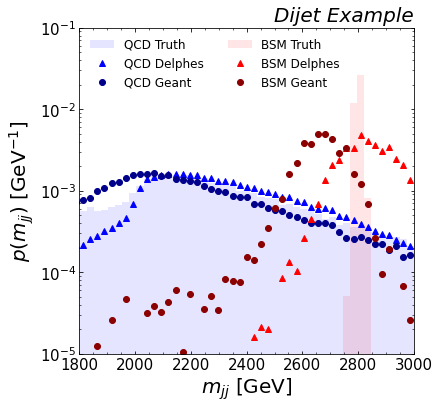

In [9]:
# ################################
# ########### DATA PLOT ##########
# ################################

lower_lim = 1750
bins = 50


fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax0.minorticks_on()

def hist_to_points(dist, weights, fmt, color, label):

    bin_counts, bin_edges, patches = plt.hist(dist,weights=weights,histtype="step",color="red",bins=np.linspace(lower_lim,3000,bins), density = True, alpha = 0)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.errorbar(x = bin_centers, y = bin_counts, fmt = fmt, color = color, label = label)

# plt.hist(delphes_v2[:,1],weights=w10*np.ones(len(delphes_v2)),alpha=0.1,bins=np.linspace(0,3000,50), density = True)
# plt.hist(delphes14_v2[:,1],weights=w14*np.ones(len(delphes14_v2)),alpha=0.1,bins=np.linspace(0,3000,50), density = True)
# plt.hist(delphes18_v2[:,1],weights=w18*np.ones(len(delphes18_v2)),alpha=0.1,bins=np.linspace(0,3000,50), density = True)

print(delphes_v2_all.shape)
# print(mjjs_delphes.shape)
# plt.hist(delphes_v2_all[:,1],weights=delphes_weights,histtype="stepfilled",color="red", alpha = 0.1,bins=np.linspace(2000,3000,50), density = True, label = "QCD Delphes")

hist_to_points(mjjs_delphes, weights_delphes, fmt = "^", color = "blue", label = "QCD Delphes")
hist_to_points(mjjs, weights, fmt = "o", color = "darkblue", label = "QCD Geant")
plt.hist(mjjsg,weights=weights,histtype="stepfilled",color="blue",bins=np.linspace(lower_lim,3000,bins), density = True, alpha = 0.1, label = "QCD Truth")

# BSM
ww_delphes,bin = np.histogram(mjjs_delphes,bins=np.linspace(lower_lim,3000,bins))
ww_delphes = np.interp(mjjs_delphes,0.5*(bin[:-1]+bin[1:]),ww_delphes)
weights_delphes_bsm = norm.pdf(mjjsg_delphes,resonance_mass,resonance_width)/ww_delphes

hist_to_points(mjjs_delphes, weights_delphes_bsm, fmt = "^", color = "red", label = "BSM Delphes")
hist_to_points(mjjs, weights_bsm, fmt = "o", color = "darkred", label = "BSM Geant")
plt.hist(mjjsg,weights=weights_bsm,histtype="stepfilled",color="red",bins=np.linspace(lower_lim,3000,bins), density = True, alpha = 0.1, label = "BSM Truth")



# plt.hist(mjjs_delphes,weights=weights_delphes_bsm,histtype="stepfilled",color="red", alpha = 0.1,bins=np.linspace(lower_lim,3000,bins), density = True, label = "BSM Delphes")
# plt.hist(mjjs,weights=weights_bsm,histtype="step",color="red",bins=np.linspace(lower_lim,3000,bins), density = True, label = "BSM GEANT")

# hist_to_points(mjjsg, weights_bsm, fmt = "o", color = "darkred", label = "BSM_truth")
# bin_counts, bin_edges, patches = plt.hist(mjjsg,weights=weights_bsm,histtype="step",color="red",bins=np.linspace(lower_lim,3000,bins), density = True, alpha = 0)
# bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# plt.errorbar(x = bin_centers, y = bin_counts, fmt = "o", color = "darkred", label = "BSM Truth")



# plt.hist(mjjsg_delphes,weights=weights_delphes,histtype="stepfilled",color="green", alpha = 0.1,bins=np.linspace(2000,3000,50), density = True, label = "QCD Delphes")
plt.yscale("log")
plt.ylabel("$p(m_{jj})$ [GeV$^{-1}$]", fontsize = 20)
plt.ylim(1e-5, 1e-1)
plt.xlim(1800, 3000)
plt.xlabel("$m_{jj}$ [GeV]", fontsize = 20)
plt.title("Dijet Example", fontsize = 20, fontstyle = "italic", loc = "right")

handles, labels = plt.gca().get_legend_handles_labels()
print(handles, labels)
order = [0, 2, 3, 1, 4, 5]
plt.legend([handles[i] for i in order], [labels[i] for i in order],frameon = False, fontsize = 12, loc = "upper left", ncol = 2)


plt.savefig("QCD_dist.pdf", bbox_inches='tight')


# Simulation Based calibration

In [10]:
#Divide in half

inds1_d = np.random.choice(range(len(mjjs_delphes)), size=(int(0.5*len(mjjs_delphes)),), replace=False)
inds2_d = list(set(range(len(inds1_d))) - set(inds1_d))

mjjs_delphes = np.array(mjjs_delphes)
mjjsg_delphes = np.array(mjjsg_delphes)
weights_delphes = np.array(weights_delphes)
mjjs_delphes_firsthalf = mjjs_delphes[inds1_d]
mjjs_delphes_secondhalf = mjjs_delphes[inds2_d]
mjjsg_delphes_firsthalf = mjjsg_delphes[inds1_d]
mjjsg_delphes_secondhalf = mjjsg_delphes[inds2_d]
weights_delphes_firsthalf = weights_delphes[inds1_d]
weights_delphes_secondhalf = weights_delphes[inds2_d]

inds1 = np.random.choice(range(len(mjjs)), size=(int(0.5*len(mjjs)),), replace=False)
inds2 = list(set(range(len(inds1))) - set(inds1))

mjjs = np.array(mjjs)
mjjsg = np.array(mjjsg)
weights = np.array(weights)
mjjs_firsthalf = mjjs[inds1]
mjjs_secondhalf = mjjs[inds2]
mjjsg_firsthalf = mjjsg[inds1]
mjjsg_secondhalf = mjjsg[inds2]
weights_firsthalf = weights[inds1]
weights_secondhalf = weights[inds2]

In [11]:
inputs_prior = Input((1, ))
hidden_layer_1_prior = Dense(50, activation='relu')(inputs_prior)
hidden_layer_2_prior = Dense(50, activation='relu')(hidden_layer_1_prior)
hidden_layer_3_prior = Dense(50, activation='relu')(hidden_layer_2_prior)
outputs_prior = Dense(1, activation='linear')(hidden_layer_3_prior)
model_prior = Model(inputs=inputs_prior, outputs=outputs_prior)

model_prior.compile(loss="mse",optimizer='Adam',metrics=['accuracy'])
h = model_prior.fit(mjjs_firsthalf/1000.,
          mjjsg_firsthalf/1000.,
          epochs=50,
          sample_weight=weights_firsthalf,
          batch_size=1000)

2022-05-08 23:13:54.828817: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-08 23:13:54.828991: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rikab-LENOVO-Y700-15ISK): /proc/driver/nvidia/version does not exist
2022-05-08 23:13:54.832878: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
150/150 [==============================] - 1s 3ms/step - loss: 1.0038e-08 - accuracy: 0.0000e+00
Epoch 2/50
150/150 [==============================] - 0s 3ms/step - loss: 9.6253e-09 - accuracy: 0.0000e+00
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 9.1040e-09 - accuracy: 0.0000e+00
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 8.5337e-09 - accuracy: 0.0000e+00
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 7.9480e-09 - accuracy: 0.0000e+00
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 7.3705e-09 - accuracy: 0.0000e+00
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 6.8166e-09 - accuracy: 0.0000e+00
Epoch 8/50
150/150 [==============================] - 0s 3ms/step - loss: 6.2971e-09 - accuracy: 0.0000e+00
Epoch 9/50
150/150 [==============================] - 0s 3ms/step - loss: 5.7878e-09 - accuracy: 0.0000e+00
Epoch 10/50
150/150 [=======

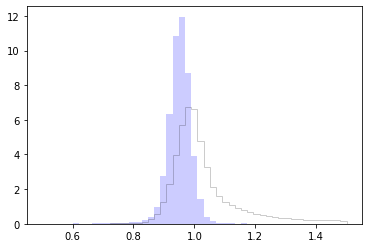

In [12]:
pres_mass = model_prior.predict(mjjs_secondhalf/1000.,batch_size=1000).flatten()
_,_,_=plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=weights_secondhalf,bins=np.linspace(0.5,1.5,50),alpha=0.2,density=True,color="blue",label="QCD, Delphes")
_,_,_=plt.hist(1000*pres_mass/mjjsg_secondhalf,weights=weights_secondhalf,bins=np.linspace(0.5,1.5,50),alpha=0.2,density=True,color="black",histtype="step")

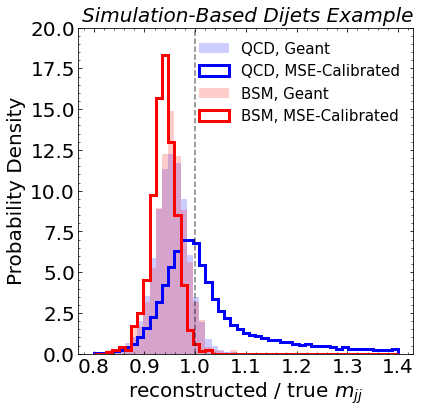

In [13]:
mybins = np.logspace(np.log(2000)/np.log(10),np.log(5000)/np.log(10),50)
mybinsB = np.linspace(0.8,1.4,50)

resmass = 2800

fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()


def hist_to_points(dist, weights, fmt, color, label):

    bin_counts, bin_edges, patches = plt.hist(dist,weights=weights,histtype="step",color="red",bins=mybinsB, density = True, alpha = 0)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.errorbar(x = bin_centers, y = bin_counts, fmt = fmt, color = color, label = label)

plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=weights_secondhalf, histtype="stepfilled", bins=mybinsB, density = True, color = "blue", label="QCD, Geant",alpha = 0.2)
_,_,_=plt.hist(1000*pres_mass/mjjsg_secondhalf,weights=weights_secondhalf,bins=mybinsB,density=True,color="blue",histtype="step",label="QCD, MSE-Calibrated",lw=3)

# _,_,_=plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=weights_secondhalf,bins=mybinsB,alpha=0.2,density=True,color="blue",label="QCD, Geant4")

ww,bins = np.histogram(mjjsg_secondhalf,bins=mybins)
ww = np.interp(mjjsg_secondhalf,0.5*(bins[:-1]+bins[1:]),ww)


plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww, bins=mybinsB, density = True, histtype="stepfilled", color = "red", label="BSM, Geant", alpha = 0.2)
_,_,_=plt.hist(1000*pres_mass/mjjsg_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybinsB,density=True,color="red",histtype="step",label="BSM, MSE-Calibrated",lw=3)


# _,_,_=plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybinsB,alpha=0.7,density=True,color="orange",label="BSM, Geant4")

plt.ylabel("Probability Density",fontsize=20)
#plt.xlim([mymin,mymax])
#plt.yscale("log")
#plt.ylim([1e-6,1e-1])
#plt.locator_params(axis='y', nbins=6)
plt.axvline(1,alpha=0.5, color = "black", linestyle = "--")
plt.xlabel("reconstructed / true $m_{jj}$",fontsize=20)
plt.ylim(0, 20)
plt.legend(frameon=False,fontsize=15,ncol=1)
_=plt.title("Simulation-Based Dijets Example",loc="right",fontsize=20, fontstyle="italic")
plt.savefig("NN_prior.pdf",bbox_inches='tight')

# GA-Based Calibrations

In [22]:

from ifn.Architectures.utils import build_gIFN_DNN
from ifn.Architectures.ifn import IFN, mine_loss, MI

X, Y = np.expand_dims(mjjs_firsthalf/1000.0,1) , np.expand_dims(mjjsg_firsthalf/1000.0,1)

# Build model
ifn = build_gIFN_DNN(1, 1, [32, 32, 32], l2_reg = 0, d_l1_reg= 1e-3, )
ifn.pre_train([X, Y], epochs = 1, batch_size = 1024, verbose = True)
opt = tf.keras.optimizers.Adam(clipnorm = 1.0)
ifn.compile(loss=mine_loss, optimizer=opt, metrics = [MI,])


# Fit
history = ifn.fit([X, Y],
            batch_size= 1024,
            epochs = 150,
            sample_weight= weights_firsthalf,
            shuffle=True, verbose= 2)


Start of epoch 0
Pre-Train Epoch 0, Batch 0: Loss = 323.684, a = 17.640 b = 6.936, c = -4.126, Joint = -14.085, Marginal = -20.209, MI = -14.125
Pre-Train Epoch 0, Batch 1: Loss = 74.496, a = 20.254 b = 4.258, c = -3.342, Joint = -4.888, Marginal = -10.115, MI = -6.044
Pre-Train Epoch 0, Batch 2: Loss = 40.537, a = 22.186 b = 2.605, c = -2.231, Joint = 0.169, Marginal = -3.871, MI = -2.167
Pre-Train Epoch 0, Batch 3: Loss = 47.301, a = 22.954 b = 1.702, c = -5.580, Joint = 2.710, Marginal = -0.721, MI = -0.522
Pre-Train Epoch 0, Batch 4: Loss = 53.082, a = 22.465 b = 1.229, c = -5.180, Joint = 3.855, Marginal = 0.814, MI = 0.018
Pre-Train Epoch 0, Batch 5: Loss = 54.493, a = 22.021 b = 0.897, c = -5.575, Joint = 4.239, Marginal = 1.945, MI = 0.041
Pre-Train Epoch 0, Batch 6: Loss = 49.626, a = 19.893 b = 0.772, c = -2.507, Joint = 4.159, Marginal = 2.302, MI = 0.133
Pre-Train Epoch 0, Batch 7: Loss = 44.999, a = 18.639 b = 0.752, c = -5.492, Joint = 3.867, Marginal = 2.262, MI = -0.04

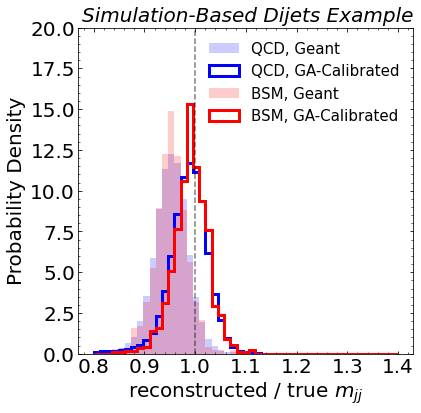

In [23]:
pres_mass = np.squeeze(ifn.maximum_likelihood(np.expand_dims(mjjs_secondhalf/1000.0, 1)))


mybins = np.logspace(np.log(2000)/np.log(10),np.log(5000)/np.log(10),50)
mybinsB = np.linspace(0.8,1.4,50)

resmass = 2800

fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()


def hist_to_points(dist, weights, fmt, color, label):

    bin_counts, bin_edges, patches = plt.hist(dist,weights=weights,histtype="step",color="red",bins=mybinsB, density = True, alpha = 0)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.errorbar(x = bin_centers, y = bin_counts, fmt = fmt, color = color, label = label)

plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=weights_secondhalf, histtype="stepfilled", bins=mybinsB, density = True, color = "blue", label="QCD, Geant",alpha = 0.2)
_,_,_=plt.hist(1000*pres_mass/mjjsg_secondhalf,weights=weights_secondhalf,bins=mybinsB,density=True,color="blue",histtype="step",label="QCD, GA-Calibrated",lw=3)

# _,_,_=plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=weights_secondhalf,bins=mybinsB,alpha=0.2,density=True,color="blue",label="QCD, Geant4")

ww,bins = np.histogram(mjjsg_secondhalf,bins=mybins)
ww = np.interp(mjjsg_secondhalf,0.5*(bins[:-1]+bins[1:]),ww)


plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww, bins=mybinsB, density = True, histtype="stepfilled", color = "red", label="BSM, Geant", alpha = 0.2)
_,_,_=plt.hist(1000*pres_mass/mjjsg_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybinsB,density=True,color="red",histtype="step",label="BSM, GA-Calibrated",lw=3)


# _,_,_=plt.hist(mjjs_secondhalf/mjjsg_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybinsB,alpha=0.7,density=True,color="orange",label="BSM, Geant4")

plt.ylabel("Probability Density",fontsize=20)
#plt.xlim([mymin,mymax])
#plt.yscale("log")
#plt.ylim([1e-6,1e-1])
#plt.locator_params(axis='y', nbins=6)
plt.axvline(1,alpha=0.5, color = "black", linestyle = "--")
plt.xlabel("reconstructed / true $m_{jj}$",fontsize=20)
plt.ylim(0, 20)
plt.legend(frameon=False,fontsize=15,ncol=1)
_=plt.title("Simulation-Based Dijets Example",loc="right",fontsize=20, fontstyle="italic")
plt.savefig("NN_prior_GA.pdf",bbox_inches='tight')

# OT

In [16]:
x0_x = np.sort(mjjs_delphes_firsthalf)
w0_x = [x for _, x in sorted(zip(mjjs_delphes_firsthalf, weights_delphes_firsthalf))]
x0_ecdf = np.cumsum(w0_x)/np.sum(w0_x)

x1_x = np.sort(mjjs_firsthalf)
w1_x = [x for _, x in sorted(zip(mjjs_firsthalf, weights_firsthalf))]
x1_ecdf = np.cumsum(w1_x)/np.sum(w1_x)

def my_mjj_calib(x):
    firstpart = np.interp(x,x0_x,x0_ecdf)
    return np.interp(firstpart,x1_ecdf,x1_x)

(299877, 20)


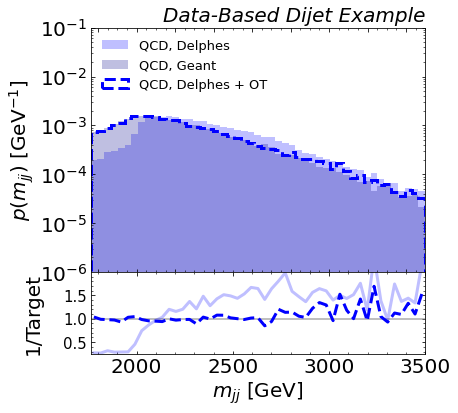

In [25]:
# QCD PLOT

bins = 50
resmass = 2800
lower_lim = 1760
upper_lim = 3500

mybins = np.linspace(lower_lim,upper_lim,bins)

fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)
ax0.minorticks_on()


def hist_to_points(dist, weights, fmt, color, label, **kwargs):

    bin_counts, bin_edges, patches = plt.hist(dist,weights=weights,histtype="step",color="red",bins=np.linspace(lower_lim,upper_lim,bins), density = True, alpha = 0)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.errorbar(x = bin_centers, y = bin_counts, fmt = fmt, color = color, label = label, **kwargs)
    return bin_counts, bin_edges, patches

# plt.hist(delphes_v2[:,1],weights=w10*np.ones(len(delphes_v2)),alpha=0.1,bins=np.linspace(0,3000,50), density = True)
# plt.hist(delphes14_v2[:,1],weights=w14*np.ones(len(delphes14_v2)),alpha=0.1,bins=np.linspace(0,3000,50), density = True)
# plt.hist(delphes18_v2[:,1],weights=w18*np.ones(len(delphes18_v2)),alpha=0.1,bins=np.linspace(0,3000,50), density = True)

print(delphes_v2_all.shape)
# print(mjjs_delphes.shape)
# plt.hist(delphes_v2_all[:,1],weights=delphes_weights,histtype="stepfilled",color="red", alpha = 0.1,bins=np.linspace(2000,3000,50), density = True, label = "QCD Delphes")


# QCD
nT, b, _ = plt.hist(mjjs_delphes_secondhalf, weights = weights_delphes_secondhalf, histtype = "stepfilled", color = "blue",bins=mybins, label = "QCD, Delphes", alpha = 0.25, density = True)
nT1,_,_=  plt.hist(mjjs_secondhalf, weights = weights_secondhalf,  histtype = "stepfilled", color = "darkblue",bins=mybins, label = "QCD, Geant", density = True, alpha = 0.25)
nT0, _, _ = plt.hist(my_mjj_calib(mjjs_delphes_secondhalf),weights=weights_delphes_secondhalf,histtype="step",color="blue",bins=mybins, density = True, alpha = 1, label = "QCD, Delphes + OT", lw = 3, ls = "--")

# BSM
ww,bin = np.histogram(mjjsg_secondhalf,bins=mybins)
ww = np.interp(mjjsg_secondhalf,0.5*(bin[:-1]+bin[1:]),ww)

ww_delphes,bin = np.histogram(mjjsg_delphes_secondhalf,bins=mybins)
ww_delphes = np.interp(mjjsg_delphes_secondhalf,0.5*(bin[:-1]+bin[1:]),ww_delphes)

# nt,_,_= hist_to_points(mjjs_delphes_secondhalf, norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes, fmt = "^", color = "red", label = "BSM, Delphes", alpha = .25)
# nt1,_,_=hist_to_points(mjjs_secondhalf, norm.pdf(mjjsg_secondhalf,resmass,10)/ww, fmt = "o", color = "darkred", label = "BSM, Geant")
# nt0,_,_=plt.hist(my_mjj_calib(mjjs_delphes_secondhalf),weights=norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes,histtype="step",color="red",bins=np.linspace(lower_lim,upper_lim,bins), density = True, alpha = 1, label = "BSM, Delphes + OT", lw = 3, ls = "--")





# nT,b,_=plt.hist(mjjs_delphes_secondhalf,weights=weights_delphes_secondhalf,bins=mybins,alpha=0.2,density=True,color="blue",label="QCD, Delphes")
# nT0,_,_=plt.hist(my_mjj_calib(mjjs_delphes_secondhalf),weights=weights_delphes_secondhalf,bins=mybins,density=True,color="black",lw=3,histtype="step",label="QCD, Delphes + OT")
# nT1,_,_=plt.hist(mjjs_secondhalf,weights=weights_secondhalf,bins=mybins,density=True,alpha=0.2,color="orange",label="QCD, Geant4")

###



# nt,_,_=plt.hist(mjjs_delphes_secondhalf,weights=norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes,bins=mybins,alpha=0.7,density=True,color="blue",label="BSM, Delphes")
# nt0,_,_=plt.hist(my_mjj_calib(mjjs_delphes_secondhalf),weights=norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes,bins=mybins,density=True,histtype="step",ls=":",lw=3,color="black",label="BSM, Delphes + OT")
# nt1,_,_=plt.hist(mjjs_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybins,alpha=0.7,density=True,color="orange",label="BSM, Geant4")

###

plt.ylabel("$p(m_{jj})$ [GeV$^{-1}$]",fontsize=20)
plt.yscale("log")
plt.ylim([1e-6,1e-1])
plt.xlim(lower_lim, upper_lim)
plt.legend(frameon=False,fontsize=13,ncol=1, loc = "upper left")
_=plt.title("Data-Based Dijet Example",loc="right",fontsize=20, fontstyle="italic")

ax1 = plt.subplot(gs[1])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(direction="in",which="both")
ax1.minorticks_on()
plt.locator_params(axis='x', nbins=6)
plt.xlabel("$m_{jj}$ [GeV]",fontsize=20)
plt.ylabel("1/Target",fontsize=20, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plt.axhline(y=1,linewidth=2, color='gray', alpha=0.5)  
plt.plot(0.5*(b[1:]+b[:-1]),nT0/(nT1+0),color='blue', lw = 3, ls = "--")
plt.plot(0.5*(b[1:]+b[:-1]),nT/(nT1+0),color='blue',lw=3,alpha=0.25)

# bb=0.5*(b[1:]+b[:-1])
# nt[bb<2800]=0
# nt0[bb<2800]=0
# plt.plot(0.5*(b[1:]+b[:-1]),nt0/(nt1+0),color='red',lw = 3, ls="--")
# plt.plot(0.5*(b[1:]+b[:-1]),nt/(nt1+0),color='red',lw=3,alpha=0.25)

plt.ylim(0.251,1.99)
plt.xlim(lower_lim, upper_lim)
plt.savefig("OT_QCD.pdf",bbox_inches='tight')

(299877, 20)


<Figure size 432x288 with 0 Axes>

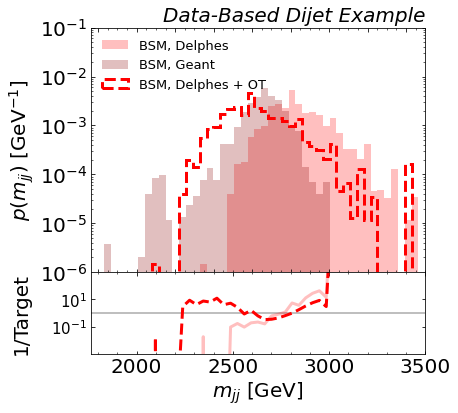

In [26]:
# BSM PLOT

bins = 50
resmass = 2800
lower_lim = 1760
upper_lim = 3500

mybins = np.linspace(lower_lim,upper_lim,bins)

plt.close()
plt.clf()
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)
ax0.minorticks_on()


def hist_to_points(dist, weights, fmt, color, label, **kwargs):

    bin_counts, bin_edges, patches = plt.hist(dist,weights=weights,histtype="step",color="red",bins=np.linspace(lower_lim,upper_lim,bins), density = True, alpha = 0)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.errorbar(x = bin_centers, y = bin_counts, fmt = fmt, color = color, label = label, **kwargs)
    return bin_counts, bin_edges, patches

# plt.hist(delphes_v2[:,1],weights=w10*np.ones(len(delphes_v2)),alpha=0.1,bins=np.linspace(0,3000,50), density = True)
# plt.hist(delphes14_v2[:,1],weights=w14*np.ones(len(delphes14_v2)),alpha=0.1,bins=np.linspace(0,3000,50), density = True)
# plt.hist(delphes18_v2[:,1],weights=w18*np.ones(len(delphes18_v2)),alpha=0.1,bins=np.linspace(0,3000,50), density = True)

print(delphes_v2_all.shape)
# print(mjjs_delphes.shape)
# plt.hist(delphes_v2_all[:,1],weights=delphes_weights,histtype="stepfilled",color="red", alpha = 0.1,bins=np.linspace(2000,3000,50), density = True, label = "QCD Delphes")


# BSM
ww,bin = np.histogram(mjjsg_secondhalf,bins=mybins)
ww = np.interp(mjjsg_secondhalf,0.5*(bin[:-1]+bin[1:]),ww)

ww_delphes,bin = np.histogram(mjjsg_delphes_secondhalf,bins=mybins)
ww_delphes = np.interp(mjjsg_delphes_secondhalf,0.5*(bin[:-1]+bin[1:]),ww_delphes)

nt, b, _ = plt.hist(mjjs_delphes_secondhalf, weights = norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes, histtype = "stepfilled", color = "red",bins=mybins, label = "BSM, Delphes", alpha = 0.25, density = True)
nt1,_,_=  plt.hist(mjjs_secondhalf, weights = norm.pdf(mjjsg_secondhalf,resmass,10)/ww,  histtype = "stepfilled", color = "darkred",bins=mybins, label = "BSM, Geant", density = True, alpha = 0.25)
nt0, _, _ = plt.hist(my_mjj_calib(mjjs_delphes_secondhalf),weights=norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes,histtype="step",color="red",bins=mybins, density = True, alpha = 1, label = "BSM, Delphes + OT", lw = 3, ls = "--")



# nt,b,_= hist_to_points(mjjs_delphes_secondhalf, norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes, fmt = "^", color = "red", label = "BSM, Delphes", alpha = .25)
# nt1,_,_=hist_to_points(mjjs_secondhalf, norm.pdf(mjjsg_secondhalf,resmass,10)/ww, fmt = "o", color = "darkred", label = "BSM, Geant")
# nt0,_,_=plt.hist(my_mjj_calib(mjjs_delphes_secondhalf),weights=norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes,histtype="step",color="red",bins=np.linspace(lower_lim,upper_lim,bins), density = True, alpha = 1, label = "BSM, Delphes + OT", lw = 3, ls = "--")





# nT,b,_=plt.hist(mjjs_delphes_secondhalf,weights=weights_delphes_secondhalf,bins=mybins,alpha=0.2,density=True,color="blue",label="QCD, Delphes")
# nT0,_,_=plt.hist(my_mjj_calib(mjjs_delphes_secondhalf),weights=weights_delphes_secondhalf,bins=mybins,density=True,color="black",lw=3,histtype="step",label="QCD, Delphes + OT")
# nT1,_,_=plt.hist(mjjs_secondhalf,weights=weights_secondhalf,bins=mybins,density=True,alpha=0.2,color="orange",label="QCD, Geant4")

###



# nt,_,_=plt.hist(mjjs_delphes_secondhalf,weights=norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes,bins=mybins,alpha=0.7,density=True,color="blue",label="BSM, Delphes")
# nt0,_,_=plt.hist(my_mjj_calib(mjjs_delphes_secondhalf),weights=norm.pdf(mjjsg_delphes_secondhalf,resmass,10)/ww_delphes,bins=mybins,density=True,histtype="step",ls=":",lw=3,color="black",label="BSM, Delphes + OT")
# nt1,_,_=plt.hist(mjjs_secondhalf,weights=norm.pdf(mjjsg_secondhalf,resmass,10)/ww,bins=mybins,alpha=0.7,density=True,color="orange",label="BSM, Geant4")

###

plt.ylabel("$p(m_{jj})$ [GeV$^{-1}$]",fontsize=20)
plt.yscale("log")
plt.ylim([1e-6,1e-1])
plt.xlim(lower_lim, upper_lim)
plt.legend(frameon=False,fontsize=13,ncol=1, loc = "upper left")
_=plt.title("Data-Based Dijet Example",loc="right",fontsize=20, fontstyle="italic")

ax1 = plt.subplot(gs[1])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(direction="in",which="both")
ax1.minorticks_on()
plt.locator_params(axis='x', nbins=6)
plt.xlabel("$m_{jj}$ [GeV]",fontsize=20)
plt.ylabel("1/Target",fontsize=20, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plt.axhline(y=1,linewidth=2, color='gray', alpha=0.5)  

bb=0.5*(b[1:]+b[:-1])
# nt[bb<2800]=0
# nt0[bb<2800]=0
plt.plot(0.5*(b[1:]+b[:-1]),nt0/(nt1+0),color='red',lw = 3, ls="--")
plt.plot(0.5*(b[1:]+b[:-1]),nt/(nt1+0),color='red',lw=3,alpha=0.25)

plt.ylim(0.0011,900.0)
plt.yscale("log")
plt.xlim(lower_lim, upper_lim)
plt.savefig("OT_BSM.pdf",bbox_inches='tight')